In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
df = pd.read_csv('/content/FINAL data-2.csv')


In [6]:
df.head()

,Date,Time,Year,Month,Day,Hour,Min,Second,latitude,longitude,depth,mag,magType,place,depthError,magError
0,11-05-1905,17:9:1.46,1905,5,11,17,9,1.46,25.967,143.332,15.0,6.78,mw,"Volcano Islands, Japan region",25.0,0.20
1,02-06-1905,5:39:39.6,1905,6,2,5,39,39.60,33.715,131.759,60.0,6.91,mw,"31 km SSW of Hikari, Japan",15.4,0.53
2,06-07-1905,16:20:46.93,1905,7,6,16,20,46.93,38.417,144.119,15.0,7.67,mw,"217 km ESE of Kamaishi, Japan",25.0,0.20
3,21-01-1906,13:49:33.57,1906,1,21,13,49,33.57,34.175,138.025,300.0,7.40,mw,"50 km SSW of ?yama, Japan",25.0,0.30
4,24-02-1906,0:13:40.73,1906,2,24,0,13,40.73,34.633,141.424,15.0,6.25,mw,"116 km ESE of Katsuura, Japan",15.9,0.20


Visual Inspection:
        Plot the "mag" column over time to visualize any trends or patterns.
        Identify if there are any clear seasonality or irregularities.

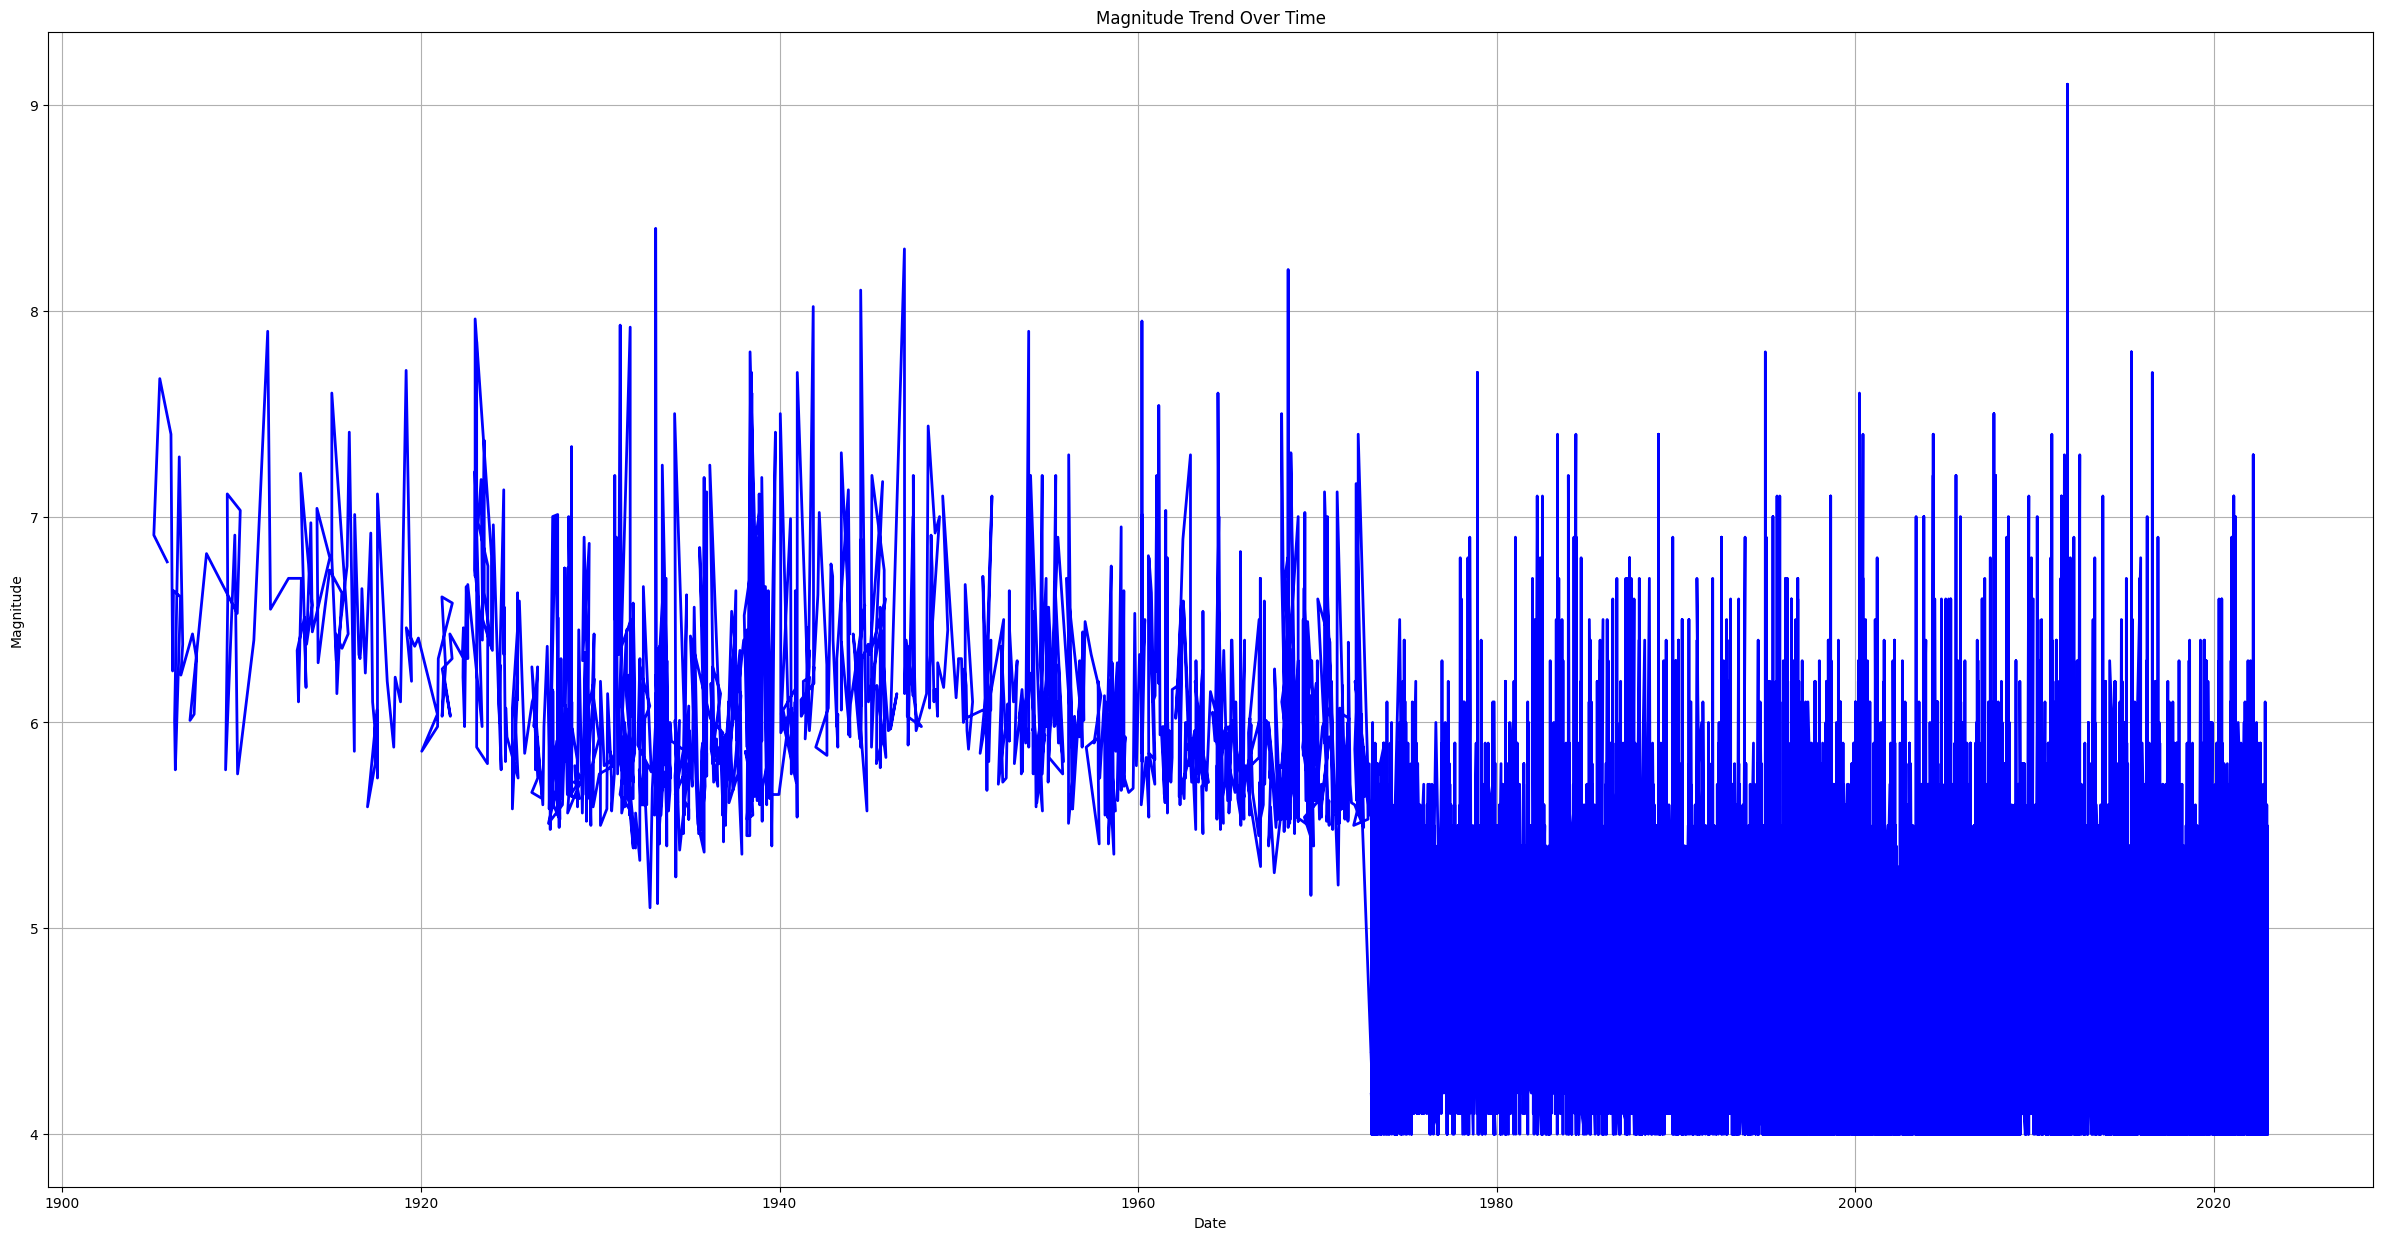

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot the "mag" column over time
plt.figure(figsize=(30, 15))
plt.plot(df['Date'], df['mag'], color='b', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Magnitude Trend Over Time')
plt.grid(True)
plt.show()


To perform a trend analysis of the "mag" column over time, we can use a simple linear regression model to identify any underlying trend

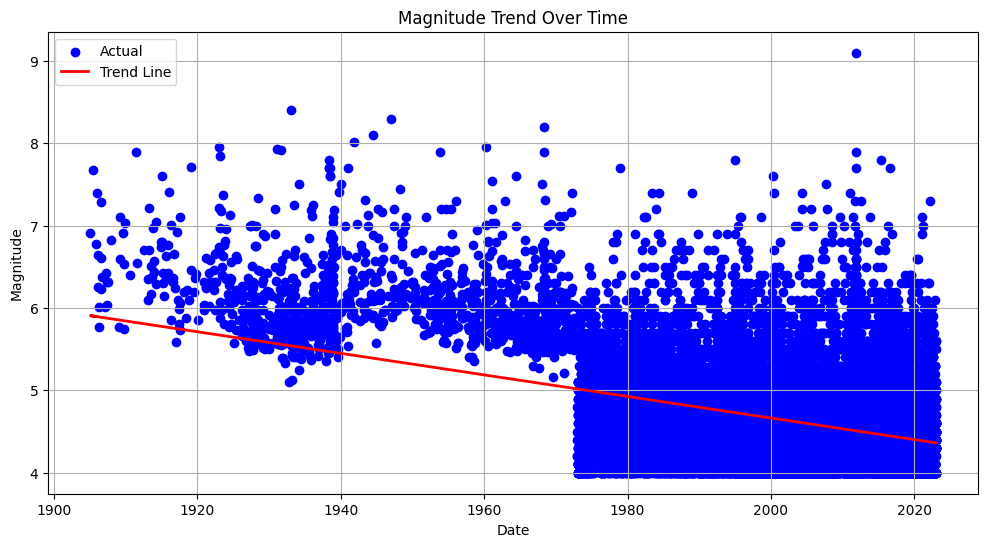

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a numerical representation of time (e.g., number of days since the first observation)
df['Time'] = (df['Date'] - df['Date'].min()).dt.days

# Fit a linear regression model to the "mag" column
X = df['Time'].values.reshape(-1, 1)
y = df['mag'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Generate predictions using the linear regression model
predictions = model.predict(X)

# Plot the actual "mag" values and the trend line
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['mag'], color='b', label='Actual')
plt.plot(df['Date'], predictions, color='r', linewidth=2, label='Trend Line')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Magnitude Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()


Conclusion- I can see the linear trend line going downside over time starting from just below 6 mag in the year between 1900-1920 to apprx 4.5 mag in the years between 2005 till 2023

Analyzing the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) of the "mag" column

<Figure size 1200x600 with 0 Axes>

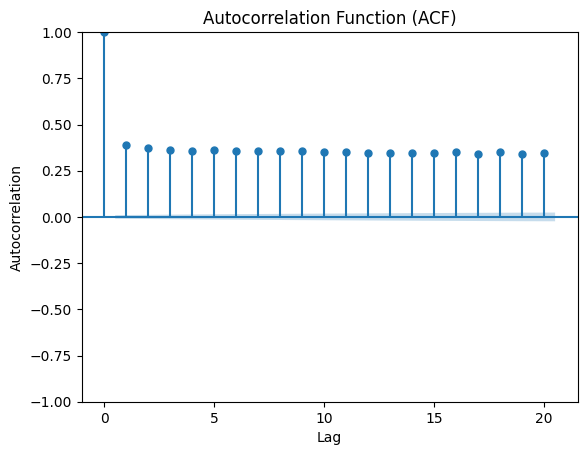

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

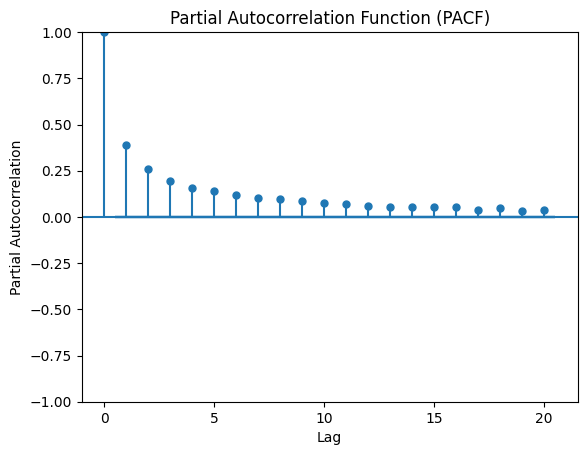

In [17]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF
acf = sm.tsa.stattools.acf(df['mag'].values, nlags=20)
pacf = sm.tsa.stattools.pacf(df['mag'].values, nlags=20)

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df['mag'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['mag'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


The ACF and PACF plots provide insights into the correlation structure and potential lag values for the ARIMA model. They help us determine the appropriate values for the AR (autoregressive) and MA (moving average) components of the ARIMA model.

In [ ]:
# Split the dataset into training and testing sets
train_size = int(0.8 * len(df))  # 80% for training
train_data = df['mag'].values[:train_size]
test_data = df['mag'].values[train_size:]

# Train the ARIMA model
order = (p, d, q)  # Specify the order of the ARIMA model
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Forecast using the ARIMA model
forecast_values = model_fit.forecast(steps=len(test_data))[0]

# Calculate evaluation metrics
mse = mean_squared_error(test_data, forecast_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast_values)

# Calculate percentage errors, MASE, and R-squared as required

# Print the evaluation metrics
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("SMAPE:", smape)
print("MASE:", mase)
print("R-squared:", r2)
